<a href="https://colab.research.google.com/github/shalini1008/real-time-stock-analysis-using-Rnn-and-knn/blob/main/Major_project_financial_sentiment_analysis_(Team_NANDINI_NEHA_SHALINI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINACIAL SENTIMENT ANALYSIS**


# DATA FETCHING FROM FINVIZ

In [4]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'NFLX','AAPL']  # ticker is a unique series of letters assigned to a security for trading purposes

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})

    try:
        response = urlopen(req)
        html = BeautifulSoup(response, 'html')
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")




# DATA CLEANING

In [5]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        if row.a is not None:
            title = row.a.get_text()
            date_data = row.td.text.split(' ')
            date_data = list(filter(lambda x: x.strip() != '', date_data))  # Remove empty strings
            if len(date_data) == 1:
                time = date_data[0].strip()
            else:
                date = date_data[0].strip()
                time = date_data[1].strip()

            parsed_data.append([ticker, date, time, title])
        else:
            title = "Default value"
            parsed_data.append([ticker, "", "", title])

print(parsed_data)


[['AMZN', 'Today', '04:10PM', "Amazon's guidance gives a glimpse of what's to come"], ['AMZN', 'Today', '04:08PM', "Amazon's AWS hits the golden number"], ['AMZN', 'Today', '04:03PM', "Amazon's stock is zooming higher after a big revenue beat"], ['AMZN', 'Today', '04:01PM', 'Stock market today: Nasdaq leads S&P 500, Dow lower as Meta sinks after earnings with Apple, Amazon on deck'], ['AMZN', 'Today', '04:01PM', 'Amazon.com Announces Third Quarter Results'], ['AMZN', 'Today', '03:55PM', "Amazon's 'Project Rainier' is live. Could it be the catalyst AWS needs?"], ['AMZN', 'Today', '03:46PM', 'Stock Market Today: Nasdaq Slammed As Meta Dives; Apple, Amazon To Report Next (Live Coverage)'], ['AMZN', 'Today', '03:30PM', "The secret star of Amazon's earnings today could be its advertising business"], ['AMZN', 'Today', '03:17PM', 'Stock market today: Dow, S&P 500, Nasdaq slide as Meta sinks after earnings with Apple, Amazon ahead'], ['AMZN', 'Today', '03:00PM', 'Prediction: 2 AI Stocks Will B

/tmp/ipython-input-1387133712.py:4: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for row in news_table.findAll('tr'):


DATA CREATING

In [6]:
import pandas as pd
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())

  ticker   date     time                                              title
0   AMZN  Today  04:10PM  Amazon's guidance gives a glimpse of what's to...
1   AMZN  Today  04:08PM                Amazon's AWS hits the golden number
2   AMZN  Today  04:03PM  Amazon's stock is zooming higher after a big r...
3   AMZN  Today  04:01PM  Stock market today: Nasdaq leads S&P 500, Dow ...
4   AMZN  Today  04:01PM         Amazon.com Announces Third Quarter Results


# USING LEMMATIZATION




In [7]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
print(df['title'])
corpus=[]

0      Amazon's guidance gives a glimpse of what's to...
1                    Amazon's AWS hits the golden number
2      Amazon's stock is zooming higher after a big r...
3      Stock market today: Nasdaq leads S&P 500, Dow ...
4             Amazon.com Announces Third Quarter Results
                             ...                        
395    Stock market today: Dow, S&P 500, Nasdaq mixed...
396    Stock market today: Dow, S&P 500, Nasdaq waver...
397    Apple Q4 Preview: Can iPhone 17 and AI Keep th...
398           The Rise of Integrated Financial Platforms
399    Stock market today: Dow, S&P 500, Nasdaq rise ...
Name: title, Length: 400, dtype: object


In [10]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    print(review)  # Add this line to see the preprocessed review
    corpus.append(review)


amazon guidance give glimpse come
amazon aws hit golden number
amazon stock zooming higher big revenue beat
stock market today nasdaq lead p dow lower meta sink earnings apple amazon deck
amazon com announces third quarter result
amazon project rainier live could catalyst aws need
stock market today nasdaq slammed meta dive apple amazon report next live coverage
secret star amazon earnings today could advertising business
stock market today dow p nasdaq slide meta sink earnings apple amazon ahead
prediction ai stock worth apple stock year end
amazon round big tech earnings know
apple amazon earnings follow metas tough day watch
driver left ups taking buyout analyst say
analyst amazon
amazon stock magnificent laggard coiled spring
ai value stock thatll thinking there bubble
dow losing steam still leading p nasdaq
freight manufacturing layoff sweep across supply chain
amazon custom trainium chip face critical moment
government shutdown killed ipo navan stock tumble debut
stock market tod

In [11]:
print(corpus)

['amazon guidance give glimpse come', 'amazon aws hit golden number', 'amazon stock zooming higher big revenue beat', 'stock market today nasdaq lead p dow lower meta sink earnings apple amazon deck', 'amazon com announces third quarter result', 'amazon project rainier live could catalyst aws need', 'stock market today nasdaq slammed meta dive apple amazon report next live coverage', 'secret star amazon earnings today could advertising business', 'stock market today dow p nasdaq slide meta sink earnings apple amazon ahead', 'prediction ai stock worth apple stock year end', 'amazon round big tech earnings know', 'apple amazon earnings follow metas tough day watch', 'driver left ups taking buyout analyst say', 'analyst amazon', 'amazon stock magnificent laggard coiled spring', 'ai value stock thatll thinking there bubble', 'dow losing steam still leading p nasdaq', 'freight manufacturing layoff sweep across supply chain', 'amazon custom trainium chip face critical moment', 'government sh

 #  Creating the Bag of Words model


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()



In [13]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
X.shape

(400, 868)

# USING K-MEANS

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans




# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X)

cluster_sentiment = {
    0: "positive",
    1: "negative",
    2: "neutral"
}

# Print cluster labels
print(cluster_labels)


[2 2 1 2 2 2 2 2 2 1 2 2 0 2 1 1 0 0 2 1 2 2 2 2 2 0 2 2 0 2 0 1 1 0 0 2 0
 0 0 2 1 1 1 0 0 0 0 2 2 0 0 1 0 0 1 2 1 0 1 0 1 2 1 2 2 2 1 2 2 2 0 2 1 2
 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 2 2 2 0 0 2 0 0 2 2 1 0 0 1 0 2 1 1
 0 0 1 2 0 1 2 2 0 0 0 1 2 2 1 2 1 2 0 1 0 0 1 2 1 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 2 0 1 1 0 1 0 0
 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 2 0 1 0 1 0 0 1 1 1 2 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 1 1 0 2 0 0 2 2 0 0 2 0 0 2 1 1 1 0 2 0 2 2 2 0 2 2 2 0 0 0 0 2 0 2 0 0
 1 0 0 0 0 0 1 2 1 0 0 1 0 0 1 0 1 2 0 1 1 0 0 2 0 0 2 2 2 2 2 1 1 2 1 0 1
 2 2 2 1 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]


In [16]:
# Assign sentiments to sentences based on cluster labels
sentiment_predictions = [cluster_sentiment[label] for label in cluster_labels]

In [17]:
# Display sentences and predicted sentiments
for sentence, sentiment in zip(corpus, sentiment_predictions):
    print(f"Sentence: {sentence} - Predicted Sentiment from k-means: {sentiment}")

Sentence: amazon guidance give glimpse come - Predicted Sentiment from k-means: neutral
Sentence: amazon aws hit golden number - Predicted Sentiment from k-means: neutral
Sentence: amazon stock zooming higher big revenue beat - Predicted Sentiment from k-means: negative
Sentence: stock market today nasdaq lead p dow lower meta sink earnings apple amazon deck - Predicted Sentiment from k-means: neutral
Sentence: amazon com announces third quarter result - Predicted Sentiment from k-means: neutral
Sentence: amazon project rainier live could catalyst aws need - Predicted Sentiment from k-means: neutral
Sentence: stock market today nasdaq slammed meta dive apple amazon report next live coverage - Predicted Sentiment from k-means: neutral
Sentence: secret star amazon earnings today could advertising business - Predicted Sentiment from k-means: neutral
Sentence: stock market today dow p nasdaq slide meta sink earnings apple amazon ahead - Predicted Sentiment from k-means: neutral
Sentence: p

# IMPLEMENTATION OF SENTIMENT ANALYSIS(using vader tool of NLTK)

In [18]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


In [19]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())

  ticker   date     time                                              title
0   AMZN  Today  04:10PM  Amazon's guidance gives a glimpse of what's to...
1   AMZN  Today  04:08PM                Amazon's AWS hits the golden number
2   AMZN  Today  04:03PM  Amazon's stock is zooming higher after a big r...
3   AMZN  Today  04:01PM  Stock market today: Nasdaq leads S&P 500, Dow ...
4   AMZN  Today  04:01PM         Amazon.com Announces Third Quarter Results


In [20]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
print(df['title'])

0      Amazon's guidance gives a glimpse of what's to...
1                    Amazon's AWS hits the golden number
2      Amazon's stock is zooming higher after a big r...
3      Stock market today: Nasdaq leads S&P 500, Dow ...
4             Amazon.com Announces Third Quarter Results
                             ...                        
395    Stock market today: Dow, S&P 500, Nasdaq mixed...
396    Stock market today: Dow, S&P 500, Nasdaq waver...
397    Apple Q4 Preview: Can iPhone 17 and AI Keep th...
398           The Rise of Integrated Financial Platforms
399    Stock market today: Dow, S&P 500, Nasdaq rise ...
Name: title, Length: 400, dtype: object


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
f=lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
print(df.head())

  ticker   date     time                                              title  \
0   AMZN  Today  04:10PM  Amazon's guidance gives a glimpse of what's to...   
1   AMZN  Today  04:08PM                Amazon's AWS hits the golden number   
2   AMZN  Today  04:03PM  Amazon's stock is zooming higher after a big r...   
3   AMZN  Today  04:01PM  Stock market today: Nasdaq leads S&P 500, Dow ...   
4   AMZN  Today  04:01PM         Amazon.com Announces Third Quarter Results   

   compound  
0    0.0000  
1    0.0772  
2    0.0000  
3   -0.1280  
4    0.0000  


# Visualization Of Data

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean(numeric_only=True)
print(mean_df)

                  compound
ticker date               
AAPL   Oct-29-25 -0.004285
       Today      0.117503
AMZN   Oct-29-25 -0.019004
       Today      0.105801
GOOG   Oct-29-25  0.132027
       Today      0.082341
NFLX   Oct-22-25 -0.064962
       Oct-23-25  0.038024
       Oct-24-25  0.132007
       Oct-25-25 -0.059300
       Oct-26-25  0.339643
       Oct-27-25  0.096900
       Oct-28-25  0.027880
       Oct-29-25  0.089300
       Today      0.387400


<Figure size 1000x800 with 0 Axes>

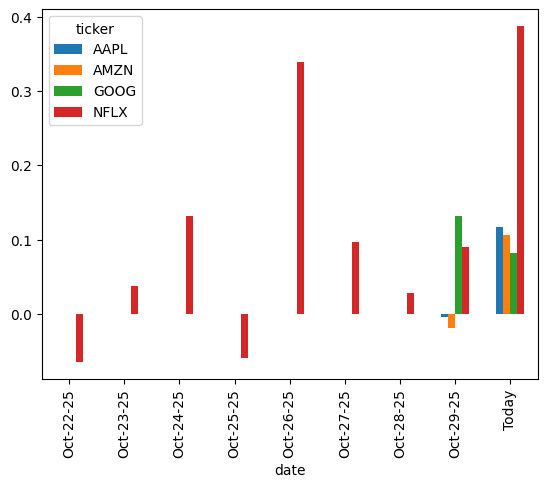

In [23]:
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

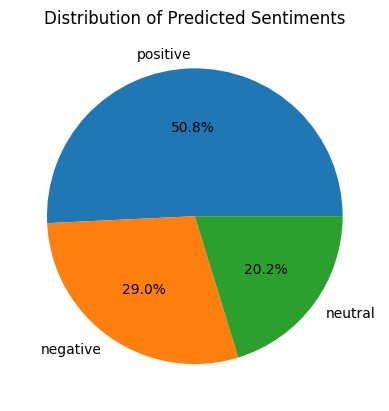

In [24]:
# Count the occurrences of each predicted sentiment
sentiment_counts = pd.Series(sentiment_predictions).value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Predicted Sentiments')
plt.show()


# Word Embedding Techniques using Embedding Layer in Keras

In [25]:
from tensorflow.keras.preprocessing.text import one_hot

In [26]:
#instance for title column if df
sent=df['title']

In [27]:
sent

,title
0,Amazon's guidance gives a glimpse of what's to...
1,Amazon's AWS hits the golden number
2,Amazon's stock is zooming higher after a big r...
3,"Stock market today: Nasdaq leads S&P 500, Dow ..."
4,Amazon.com Announces Third Quarter Results
...,...
395,"Stock market today: Dow, S&P 500, Nasdaq mixed..."
396,"Stock market today: Dow, S&P 500, Nasdaq waver..."
397,Apple Q4 Preview: Can iPhone 17 and AI Keep th...
398,The Rise of Integrated Financial Platforms


In [28]:
## Vocabulary Size
voc_size=10000

### One Hot Representation

In [29]:
one_hot_repr=[one_hot(words,voc_size) for words in sent]
print(one_hot_repr)

[[8351, 3401, 9217, 7348, 182, 4244, 8594, 8443, 8978], [8351, 8401, 4867, 4519, 8717, 1054], [8351, 524, 5336, 2557, 7885, 5303, 7348, 1960, 6568, 6868], [524, 5798, 2970, 6311, 6466, 1969, 2585, 9122, 3887, 4874, 727, 359, 4604, 5303, 674, 9936, 3295, 9847, 9976, 5137], [9847, 3638, 8649, 6857, 1628, 1396], [8351, 8745, 3176, 5336, 5124, 9781, 2170, 8323, 4519, 8177, 8401, 4076], [524, 5798, 2970, 6311, 199, 727, 359, 1873, 3295, 9847, 8443, 5619, 6381, 5124, 1363], [4519, 9964, 9460, 4244, 8351, 674, 2970, 9781, 8323, 2635, 25, 1012], [524, 5798, 2970, 3887, 1969, 2585, 9122, 6311, 6250, 727, 359, 4604, 5303, 674, 9936, 3295, 9847, 9927], [4818, 2171, 816, 2868, 7958, 8323, 3224, 6477, 8329, 3295, 524, 4979, 5008, 4877, 8590, 8476], [9847, 8443, 5533, 4244, 1960, 7384, 674, 3052, 5058, 8443, 2430], [3295, 9847, 674, 1560, 2924, 8743, 5054, 5058, 8443, 6593], [2171, 3719, 863, 7379, 2195, 5303, 6759, 8773, 1090, 1577], [1820, 3875, 1090, 2919, 9800, 9847], [5336, 8351, 524, 7348, 853

### Word Embedding Representation

In [30]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [31]:
sent_length=20
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 8594 8443 8978]
 [   0    0    0 ... 4519 8717 1054]
 [   0    0    0 ... 1960 6568 6868]
 ...
 [   0    0    0 ... 8539 6268 4148]
 [   0    0    0 ... 4723 1431 3294]
 [   0  524 5798 ... 8747 6350 4811]]


In [32]:
dim=10

In [33]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
print(model.predict(embedded_docs))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
[[[-0.00901704  0.00935541 -0.03776122 ...  0.02763135 -0.04253864
    0.02968514]
  [-0.00901704  0.00935541 -0.03776122 ...  0.02763135 -0.04253864
    0.02968514]
  [-0.00901704  0.00935541 -0.03776122 ...  0.02763135 -0.04253864
    0.02968514]
  ...
  [ 0.00507049  0.01286519  0.01568869 ... -0.00247429  0.048001
    0.003996  ]
  [ 0.01767199 -0.0004717  -0.0034394  ... -0.01818539 -0.02308518
   -0.0222276 ]
  [-0.00630689  0.0433997  -0.04898065 ... -0.02773459  0.02227013
    0.030256  ]]

 [[-0.00901704  0.00935541 -0.03776122 ...  0.02763135 -0.04253864
    0.02968514]
  [-0.00901704  0.00935541 -0.03776122 ...  0.02763135 -0.04253864
    0.02968514]
  [-0.00901704  0.00935541 -0.03776122 ...  0.02763135 -0.04253864
    0.02968514]
  ...
  [-0.03899221  0.04735691  0.04771994 ...  0.00059575  0.03725523
    0.04758574]
  [-0.03156777  0.00610108  0.04684183 ...  0.02379933  0.01938012
    0.02688608]
  [ 0.03368426  0.00148059 -0.0063

In [36]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       8351, 3401, 9217, 7348,  182, 4244, 8594, 8443, 8978], dtype=int32)

In [37]:
print(model.predict(embedded_docs)[0])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[-9.01703909e-03  9.35541466e-03 -3.77612226e-02 -1.52677782e-02
  -4.21538576e-02  3.96030024e-03 -2.05558296e-02  2.88009159e-02
  -1.21199861e-02  3.86000015e-02 -2.70003323e-02  1.25897266e-02
   1.60177462e-02 -2.07542535e-02 -1.97921395e-02  4.16080467e-02
  -1.06239542e-02 -4.56788391e-03 -1.81375854e-02  2.82850005e-02
  -4.95803840e-02 -4.01698835e-02  1.71893500e-02  3.24860103e-02
   7.40587711e-04 -4.67639938e-02 -4.13164012e-02 -2.04270240e-02
   2.99226753e-02 -4.85105403e-02  3.44295017e-02  6.34954125e-03
   4.35925163e-02  2.02006586e-02  4.44307663e-02 -1.54516101e-02
  -3.36480141e-03  2.76313461e-02 -4.25386429e-02  2.96851434e-02]
 [-9.01703909e-03  9.35541466e-03 -3.77612226e-02 -1.52677782e-02
  -4.21538576e-02  3.96030024e-03 -2.05558296e-02  2.88009159e-02
  -1.21199861e-02  3.86000015e-02 -2.70003323e-02  1.25897266e-02
   1.60177462e-02 -2.07542535e-02 -1.97921395e-02  4.16080467e-02
  -1.06239542e-02 -4.56788391e-03 -

# Recurrent Neural Network (RNN)

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [39]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_vector_features, input_length=sent_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 3 classes for positive, negative, and neutral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
one_hot_labels = to_categorical(cluster_labels, num_classes=3)
y = one_hot_labels
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
len(embedded_docs),y.shape
X_final=np.array(embedded_docs)
Y_final=np.array(y)
X_final.shape,Y_final.shape
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - accuracy: 0.4587 - loss: 1.0895 - val_accuracy: 0.5227 - val_loss: 1.0490
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4998 - loss: 1.0414 - val_accuracy: 0.5227 - val_loss: 1.0280
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4759 - loss: 1.0497 - val_accuracy: 0.5227 - val_loss: 1.0002
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4770 - loss: 1.0095 - val_accuracy: 0.5227 - val_loss: 0.9819
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.4863 - loss: 0.9695 - val_accuracy: 0.5227 - val_loss: 0.9456
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5009 - loss: 0.9184 - val_accuracy: 0.5303 - val_loss: 0.8785
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5775 - loss: 0.7990 - val_accuracy: 0.6439 - val_loss: 0.7574
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7138 - loss: 0.6480 - val_accuracy: 0.6742 - val_loss: 0.

In [41]:
predicted_sentiments = []
for sentence in sent:
    sentence_encoded = [one_hot(sentence, voc_size)]
    sentence_padded = pad_sequences(sentence_encoded, maxlen=sent_length, padding='pre')

    # Using trained model to predict sentiment
    predicted_probabilities = model.predict(sentence_padded)

    # Converting the predicted probabilities to a sentiment label
    predicted_sentiment_label = np.argmax(predicted_probabilities)

    # Maping the numeric sentiment label to its corresponding sentiment class
    sentiment_classes = ['positive', 'negative', 'neutral']
    predicted_sentiment = sentiment_classes[predicted_sentiment_label]

    # Append the predicted sentiment to the list
    predicted_sentiments.append(predicted_sentiment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━

In [42]:
# Print the predicted sentiments for all sentences
for sentence, sentiment in zip(sent, predicted_sentiments):
    print(f"Sentence: {sentence} - Predicted Sentiment from RNN: {sentiment}")

Sentence: Amazon's guidance gives a glimpse of what's to come - Predicted Sentiment from RNN: positive
Sentence: Amazon's AWS hits the golden number - Predicted Sentiment from RNN: negative
Sentence: Amazon's stock is zooming higher after a big revenue beat - Predicted Sentiment from RNN: neutral
Sentence: Stock market today: Nasdaq leads S&P 500, Dow lower as Meta sinks after earnings with Apple, Amazon on deck - Predicted Sentiment from RNN: neutral
Sentence: Amazon.com Announces Third Quarter Results - Predicted Sentiment from RNN: negative
Sentence: Amazon's 'Project Rainier' is live. Could it be the catalyst AWS needs? - Predicted Sentiment from RNN: negative
Sentence: Stock Market Today: Nasdaq Slammed As Meta Dives; Apple, Amazon To Report Next (Live Coverage) - Predicted Sentiment from RNN: neutral
Sentence: The secret star of Amazon's earnings today could be its advertising business - Predicted Sentiment from RNN: negative
Sentence: Stock market today: Dow, S&P 500, Nasdaq sli

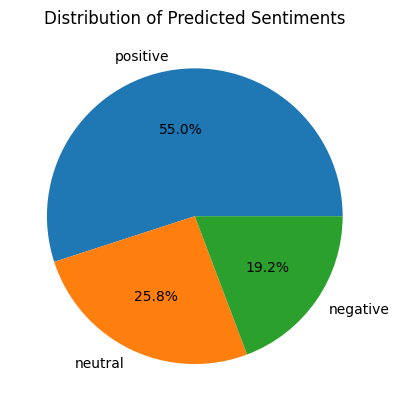

In [43]:
sentiment_counts = pd.Series(predicted_sentiments).value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Predicted Sentiments')
plt.show()


## Performace Divergence check between Both Models(RNN AND K-MEANS)

In [44]:

sentences = sent
kmeans_predictions = sentiment_predictions
rnn_predictions = predicted_sentiments

# Create a DataFrame
data = {
    'Sentence': sentences,
    'K-means Prediction': kmeans_predictions,
    'RNN Prediction': rnn_predictions
}

df = pd.DataFrame(data)
df['Predictions Match'] = df['K-means Prediction'] == df['RNN Prediction']
# Display the DataFrame
print(df)


                                              Sentence K-means Prediction  \
0    Amazon's guidance gives a glimpse of what's to...            neutral   
1                  Amazon's AWS hits the golden number            neutral   
2    Amazon's stock is zooming higher after a big r...           negative   
3    Stock market today: Nasdaq leads S&P 500, Dow ...            neutral   
4           Amazon.com Announces Third Quarter Results            neutral   
..                                                 ...                ...   
395  Stock market today: Dow, S&P 500, Nasdaq mixed...           positive   
396  Stock market today: Dow, S&P 500, Nasdaq waver...           positive   
397  Apple Q4 Preview: Can iPhone 17 and AI Keep th...           positive   
398         The Rise of Integrated Financial Platforms           positive   
399  Stock market today: Dow, S&P 500, Nasdaq rise ...           positive   

    RNN Prediction  Predictions Match  
0         positive              Fal

In [45]:
mismatched_count = df['Predictions Match'].value_counts()
print(mismatched_count)

Predictions Match
True     317
False     83
Name: count, dtype: int64


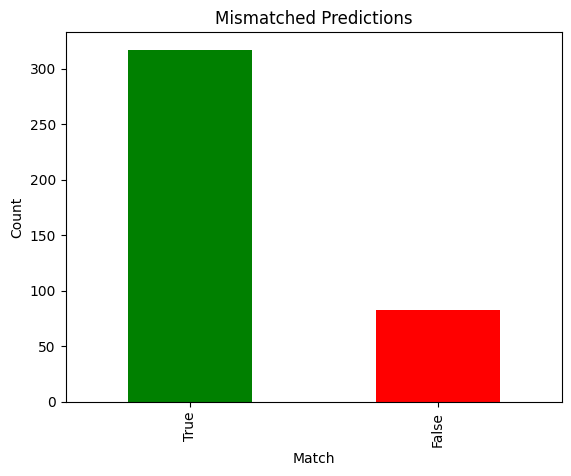

In [46]:

mismatched_count.plot(kind='bar', color=['green', 'red'])

# Customize the plot
plt.title('Mismatched Predictions')
plt.xlabel('Match')
plt.ylabel('Count')

# Show the plot
plt.show()